List the categories, glasses, ingredients or alcoholic filters
www.thecocktaildb.com/api/json/v1/1/list.php?c=list
www.thecocktaildb.com/api/json/v1/1/list.php?g=list
www.thecocktaildb.com/api/json/v1/1/list.php?i=list
www.thecocktaildb.com/api/json/v1/1/list.php?a=list

Filter by Category [There are 11 categories]
www.thecocktaildb.com/api/json/v1/1/filter.php?c=Ordinary_Drink
www.thecocktaildb.com/api/json/v1/1/filter.php?c=Cocktail

Filter by Glass [There are 32 glasses]
www.thecocktaildb.com/api/json/v1/1/filter.php?g=Cocktail_glass
www.thecocktaildb.com/api/json/v1/1/filter.php?g=Champagne_flute

Filter by ingredient [There are 100 ingredients]
www.thecocktaildb.com/api/json/v1/1/filter.php?i=Gin
www.thecocktaildb.com/api/json/v1/1/filter.php?i=Vodka

Filter by alcoholic [There are 3 alcohol types]
www.thecocktaildb.com/api/json/v1/1/filter.php?a=Alcoholic
www.thecocktaildb.com/api/json/v1/1/filter.php?a=Non_Alcoholic

Search cocktail by name [It's similar to ingredients but more fields]
www.thecocktaildb.com/api/json/v1/1/search.php?s=margarita

Search cocktails by first letter  [It's similar to ingredients but more fields]
www.thecocktaildb.com/api/json/v1/1/search.php?f=a

In [58]:
import pandas as pd
import mysql.connector
import sqlalchemy
from sqlalchemy import  text, MetaData
import sqlite3
import requests
import json
import seaborn as sns
from matplotlib import pyplot as plt


# parameter in local database/ test
userName = 'ravi'
userPass = 'Password507'
host='sakila-2.mysql.database.azure.com'
port=3306
database='test'


"\n# parameter in local database/ test\nuserName = 'ravi'\nuserPass = 'Password507'\nhost='sakila-2.mysql.database.azure.com'\nport=3306\ndatabase='test'\n"

In [53]:
# list of category(c), glass(g), ingredient(i), alcohol(a)
#response_API = requests.get("https://www.thecocktaildb.com/api/json/v1/1/list.php?g=list") 

#Search cocktails by first letter  [It's similar to ingredients but more fields]

response_a_API = requests.get("https://www.thecocktaildb.com/api/json/v1/1/search.php?f=a")
response_b_API = requests.get("https://www.thecocktaildb.com/api/json/v1/1/search.php?f=b")
response_c_API = requests.get("https://www.thecocktaildb.com/api/json/v1/1/search.php?f=c")
response_d_API = requests.get("https://www.thecocktaildb.com/api/json/v1/1/search.php?f=d")
response_e_API = requests.get("https://www.thecocktaildb.com/api/json/v1/1/search.php?f=e")




In [54]:
# Return parsed JSON data

data_a = response_a_API.json()
data_b = response_b_API.json()
data_c = response_c_API.json()
data_d = response_d_API.json()
data_e = response_e_API.json()


# Convert the combined data to a DataFrame
df = pd.DataFrame(data_a['drinks']+ data_b['drinks']+ data_c['drinks']+ data_d['drinks']+ data_e['drinks'])

# Display the DataFrame
df.head(10)

,idDrink,strDrink,strDrinkAlternate,strTags,strVideo,strCategory,strIBA,strAlcoholic,strGlass,strInstructions,...,strMeasure10,strMeasure11,strMeasure12,strMeasure13,strMeasure14,strMeasure15,strImageSource,strImageAttribution,strCreativeCommonsConfirmed,dateModified
0,17222,A1,None,None,None,Cocktail,None,Alcoholic,Cocktail glass,"Pour all ingredients into a cocktail shaker, m...",...,None,None,None,None,None,None,None,None,No,2017-09-07 21:42:09
1,13501,ABC,None,None,None,Shot,None,Alcoholic,Shot glass,Layered in a shot glass.,...,None,None,None,None,None,None,None,None,No,2016-08-31 19:32:08
2,17225,Ace,None,None,None,Cocktail,None,Alcoholic,Martini Glass,Shake all the ingredients in a cocktail shaker...,...,None,None,None,None,None,None,None,None,No,2017-09-07 22:05:06
3,14610,ACID,None,None,None,Shot,None,Alcoholic,Shot glass,Poor in the 151 first followed by the 101 serv...,...,None,None,None,None,None,None,None,None,No,2016-11-15 11:28:37
4,17837,Adam,None,"Alcoholic,Holiday",None,Ordinary Drink,None,Alcoholic,Cocktail glass,"In a shaker half-filled with ice cubes, combin...",...,None,None,None,None,None,None,None,None,Yes,2016-09-02 11:29:29
5,13938,AT&T,None,None,None,Ordinary Drink,None,Alcoholic,Highball Glass,"Pour Vodka and Gin over ice, add Tonic and Stir",...,None,None,None,None,None,None,None,None,No,2017-04-24 22:00:19
6,17833,A. J.,None,None,None,Ordinary Drink,None,Alcoholic,Cocktail glass,"Shake ingredients with ice, strain into a cock...",...,None,None,None,None,None,None,None,None,Yes,2016-09-02 11:16:58
7,15266,Avalon,None,None,None,Ordinary Drink,None,Alcoholic,Highball glass,Fill a tall glass with ice. Layer the Finlandi...,...,None,None,None,None,None,None,None,None,No,2017-04-24 22:22:11
8,15106,Apello,None,None,None,Other / Unknown,None,Non alcoholic,Collins Glass,Stirr. Grnish with maraschino cherry.,...,None,None,None,None,None,None,None,None,No,2016-07-18 22:13:35
9,17839,Affair,None,None,None,Ordinary Drink,None,Alcoholic,Highball glass,"Pour schnapps, orange juice, and cranberry jui...",...,None,None,None,None,None,None,None,None,Yes,2016-09-01 10:05:34


In [55]:
# CSV datasource - list of category(c), ingredient(i)
df_category_csv = pd.read_csv('C:/Users/rkartawi/Desktop/Ravita/MSADS/507/ADS507/category.csv')
df_ingrident_csv = pd.read_csv('C:/Users/rkartawi/Desktop/Ravita/MSADS/507/ADS507/ingredient.csv')

#Display data
df_category_csv.head()
df_ingrident_csv.head()

,strIngredient1,strCountryofOrigin
0,Light rum,Caribbean
1,Applejack,United States
2,Gin,Netherlands
3,Dark rum,Caribbean
4,Sweet Vermouth,Italy


In [59]:
# create engine to execute 
engine = sqlalchemy.create_engine(f"mysql+mysqlconnector://{userName}:{userPass}@{host}:{port}/{database}")


In [60]:
table_name = 'cocktail'

# Load DataFrame into Azure MySQL table
df.to_sql(table_name, con=engine, if_exists='replace', index=False)

df_category_csv.to_sql('category', con=engine, if_exists='replace', index=False)
df_ingrident_csv.to_sql('ingredient', con=engine, if_exists='replace', index=False)

100

In [44]:
import tkinter as tk
from tkinter import simpledialog

global_user_input = None
global_option = None

def show_popup(option):
    global global_user_input, global_option
    
    # Ask the user for input with a pop-up window
    user_input = simpledialog.askstring("Input", f"Enter {option}:")
    
    # Check if the user clicked Cancel or entered a value
    if user_input is not None:
        result_label.config(text=f"User searched for {option}: {user_input}")
        global_user_input = user_input
        global_option = option
        print(f"User searched for {option}: {user_input}")
        root.destroy()

    else:
        result_label.config(text=f"User clicked Cancel for {option}")

# Create the main window
root = tk.Tk()
root.title("Button Selection")

"""# Load the logo image and resize it
logo_image = tk.PhotoImage(file="bar_logo.png")
logo_image = logo_image.subsample(4, 5)  # Adjust the subsample values for the desired size

# Create a Label widget to display the resized logo above the buttons
logo_label = tk.Label(root, image=logo_image)
logo_label.grid(row=0, column=0, columnspan=4, pady=10)
"""
# Create buttons to trigger the pop-up for "Glass Type", "Alcohol Type", "Drink Category"
button_font = ("Arial", 12)  # Adjust the font size as needed

#glass_type_button = tk.Button(root, text="Glass Type", font=button_font, command=lambda: show_popup("Glass Type"), width=20, height=2)
#glass_type_button.grid(row=1, column=0, padx=10)

#alcohol_type_button = tk.Button(root, text="Alcohol Type", font=button_font, command=lambda: show_popup("Alcohol Type"), width=20, height=2)
#alcohol_type_button.grid(row=1, column=1, padx=10)

drink_category_button = tk.Button(root, text="Drink Category", font=button_font, command=lambda: show_popup("Drink Category"), width=20, height=2)
drink_category_button.grid(row=1, column=2, padx=10)

ingredient_button = tk.Button(root, text="Ingredient", font=button_font, command=lambda: show_popup("Ingredient"), width=20, height=2)
ingredient_button.grid(row=1, column=3, padx=10)

# Create a label to display the result
result_label = tk.Label(root, text="")
result_label.grid(row=2, column=0, columnspan=4, pady=10)

# Start the Tkinter event loop
root.mainloop()

# Access global_user_input and global_option outside the Tkinter event loop
if global_user_input is not None and global_option is not None:
    print("option:", global_option)
    print("user_input:", global_user_input)

User searched for Ingredient: Whiskey
option: Ingredient
user_input: Whiskey


In [45]:
#Query Cocktail Table by Ingridients, Glass, Category, Alcohol
if global_option == "Ingredient":
    count_query = text(f"""SELECT count(*) FROM cocktail 
                       WHERE strIngredient1 like '%{global_user_input}%'
                        or strIngredient2 like '%{global_user_input}%'
                        or strIngredient3 like '%{global_user_input}%'""")
    select_query = text(f"""SELECT strDrink, strCategory, strGlass, strAlcoholic, 
                        strIngredient1, strIngredient2, strIngredient3, strInstructions
                        FROM cocktail 
                        WHERE strIngredient1 like '%{global_user_input}%' 
                        or strIngredient2 like '%{global_user_input}%'
                        or strIngredient3 like '%{global_user_input}%'""")
else:
    global_user_input = global_user_input+" glass"
    count_query = text(f"SELECT count(*) FROM cocktail WHERE strglass = '{global_user_input}'")
    select_query = text(f""" WHERE strglass = '{global_user_input}'""")
#print(select_query)
# Execute the SELECT query
with engine.connect() as conn:
    count = conn.execute(count_query)
    count_result = count.scalar()
    
    result = conn.execute(select_query)
    rows = result.fetchall()

#Display the result
print(f"Search count: {count_result}")
df_query = pd.DataFrame(rows, columns=result.keys())
df_query

Search count: 8


,strDrink,strCategory,strGlass,strAlcoholic,strIngredient1,strIngredient2,strIngredient3,strInstructions
0,Frisco Sour,Ordinary Drink,Whiskey sour glass,Alcoholic,Blended whiskey,Benedictine,Lemon,Shake all ingredients (except slices of lemon ...
1,Hot Toddy,Cocktail,Irish coffee cup,Alcoholic,Whiskey,Honey,Cinnamon,STEP 1\r\nWhisk the whisky and honey together ...
2,Hot Creamy Bush,Coffee / Tea,Irish coffee cup,Alcoholic,Irish whiskey,Baileys irish cream,Coffee,Combine all ingredients in glass
3,Irish Coffee,Coffee / Tea,Irish coffee cup,Alcoholic,Irish whiskey,Coffee,Sugar,"Heat the coffee, whiskey and sugar; do not boi..."
4,Irish Spring,Ordinary Drink,Collins glass,Alcoholic,Irish whiskey,Peach brandy,Orange juice,Pour all ingredients (except orange slice and ...
5,Imperial Fizz,Ordinary Drink,Highball glass,Alcoholic,Light rum,Blended whiskey,Lemon,Shake all ingredients (except carbonated water...
6,Japanese Fizz,Ordinary Drink,Highball glass,Alcoholic,Blended whiskey,Lemon,Powdered sugar,Shake all ingredients (except carbonated water...
7,Jack's Vanilla Coke,Other / Unknown,Old-fashioned glass,Alcoholic,Ice,Tennessee whiskey,Vanilla extract,"After pouring in your ingredients, and adding ..."


In [39]:
# Marvin's code to build GUI + execute query and show results in it

import tkinter as tk
from tkinter import ttk
import sqlalchemy
from sqlalchemy import create_engine, text

# Connect to Azure database using SQLAlchemy (replace with your database details)
engine = sqlalchemy.create_engine(f"mysql+mysqlconnector://{userName}:{userPass}@{host}:{port}/{database}")

class CocktailApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Cocktail Search App")

        # Create a frame for the logo
        logo_frame = tk.Frame(root)
        logo_frame.pack(side='top', fill='x')

        # Add a smaller logo to the frame (use your own logo path)
        self.logo_path = 'bar_logo.png'
        self.logo = tk.PhotoImage(file=self.logo_path).subsample(4, 5)
        logo_label = tk.Label(logo_frame, image=self.logo)
        logo_label.pack()

        # Create and configure notebook
        self.notebook = ttk.Notebook(root)
        self.notebook.pack(pady=10)

        # Create tabs
        self.tabs = {}
        for category in ['Ingredient', 'Alcohol Type', 'Glass', 'Category']:
            tab = ttk.Frame(self.notebook)
            self.notebook.add(tab, text=category)
            self.tabs[category] = tab

            # Add entry and search button
            ttk.Label(tab, text=f'Enter {category}:').grid(row=0, column=0, padx=10, pady=10, sticky='w')
            self.entry_var = tk.StringVar()
            ttk.Entry(tab, textvariable=self.entry_var).grid(row=0, column=1, padx=10, pady=10)
            ttk.Button(tab, text='Search', command=lambda cat=category: self.search_category(cat)).grid(row=0, column=2, padx=10, pady=10)

            # Create treeview for displaying results
            columns = ('ID', f'{category}')
            self.tree = ttk.Treeview(tab, columns=columns, show='headings')
            for col in columns:
                self.tree.heading(col, text=col)
            self.tree.grid(row=1, column=0, columnspan=3, padx=10, pady=10)

            # Label indicating the category
            ttk.Label(tab, text=f'Results for {category}', font=('Helvetica', 12, 'bold')).grid(row=2, column=0, columnspan=3, pady=5)

    def search_category(self, category):
        # Get the entered value
        entered_value = self.entry_var.get()

        try:
            # Establish a connection
            with engine.connect() as connection:
                # Placeholder query, replace with your actual query
                query = text(f"""
                    SELECT strDrink, strCategory, strGlass, strAlcoholic, 
                           strIngredient1, strIngredient2, strIngredient3, strInstructions
                    FROM cocktail 
                    WHERE strIngredient1 LIKE :value
                        OR strIngredient2 LIKE :value
                        OR strIngredient3 LIKE :value
                        OR strCategory LIKE :value
                        OR strGlass LIKE :value
                        OR strAlcoholic LIKE :value
                """)

                # Execute the query
                result = connection.execute(query, {"value": f'%{entered_value}%'}).fetchall()

                # Display the results in the treeview
                self.display_results(category, result)

        except Exception as e:
            # Handle exceptions (e.g., print an error message)
            print(f"Error: {e}")

    def display_results(self, category, result):
        # Clear previous results
        for item in self.tree.get_children():
            self.tree.delete(item)

        # Insert new results into the treeview
        for row in result:
            self.tree.insert('', 'end', values=row)

if __name__ == "__main__":
    root = tk.Tk()
    app = CocktailApp(root)
    root.mainloop()


TclError: couldn't open "bar_logo.png": no such file or directory

In [46]:

# create view from the result in where ingredient in a  and count it in query.. plot it
# Query by Category
plot_query = text(f"""SELECT count(*) as count, strCategory
                        FROM cocktail
                        WHERE strIngredient1 like '%{global_user_input}%' 
                        or strIngredient2 like '%{global_user_input}%'
                        or strIngredient3 like '%{global_user_input}%'
                        GROUP BY strCategory""")
print(plot_query)
with engine.connect() as conn:
    result = conn.execute(plot_query)
    rows = result.fetchall()

#Display the result
df_query = pd.DataFrame(rows, columns=result.keys())
df_query

SELECT count(*) as count, strCategory
                        FROM cocktail
                        WHERE strIngredient1 like '%Whiskey%' 
                        or strIngredient2 like '%Whiskey%'
                        or strIngredient3 like '%Whiskey%'
                        GROUP BY strCategory


,count,strCategory
0,4,Ordinary Drink
1,1,Cocktail
2,2,Coffee / Tea
3,1,Other / Unknown


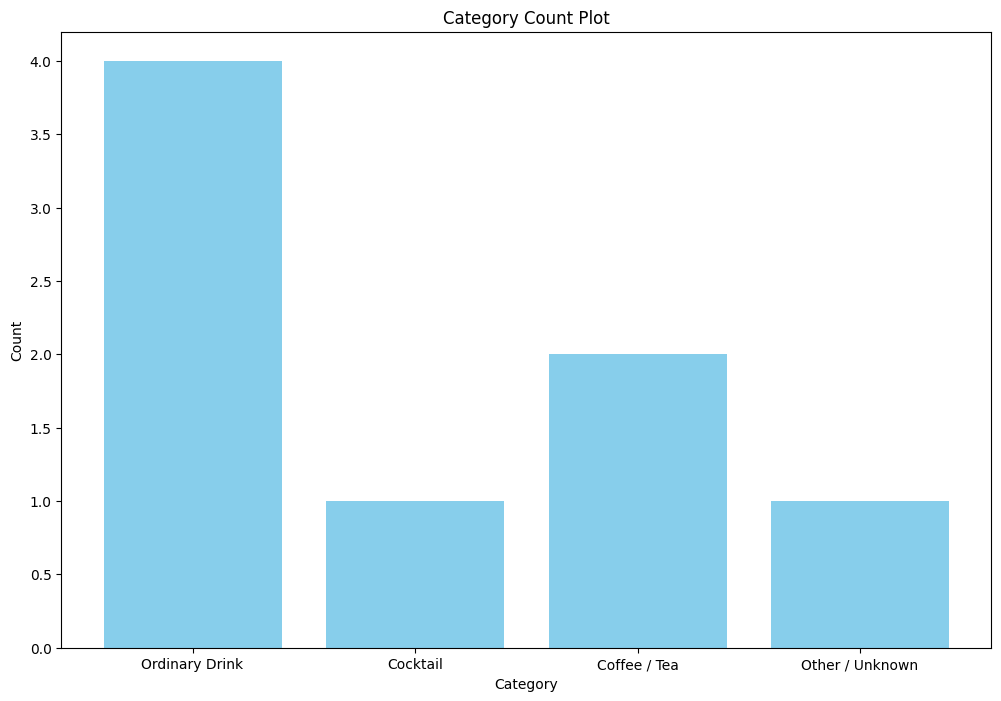

In [47]:
# Plotting the bar chart by Category
fig = plt.figure(figsize=(12, 8))
# Pivot the DataFrame to prepare for grouped bar chart
plt.bar(df_query['strCategory'], df_query['count'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Count Plot')
plt.show()

In [15]:
# Query by Ingredient country origin
plot_query = text(f"""SELECT count(*) as count, i.strCountryofOrigin
                        FROM cocktail c
                        JOIN ingredient i ON i.strIngredient1 = c.strIngredient1
                        or i.strIngredient1 = c.strIngredient2
                        or i.strIngredient1 = c.strIngredient3
                        WHERE c.strIngredient1 like '%{global_user_input}%' 
                        or c.strIngredient2 like '%{global_user_input}%'
                        or c.strIngredient3 like '%{global_user_input}%'
                        GROUP BY i.strCountryofOrigin""")
print(plot_query)
with engine.connect() as conn:
    result = conn.execute(plot_query)
    rows = result.fetchall()

#Display the result
df_query = pd.DataFrame(rows, columns=result.keys())
df_query

SELECT count(*) as count, i.strCountryofOrigin
                        FROM cocktail c
                        JOIN ingredient i ON i.strIngredient1 = c.strIngredient1
                        or i.strIngredient1 = c.strIngredient2
                        or i.strIngredient1 = c.strIngredient3
                        WHERE c.strIngredient1 like '%Vodka%' 
                        or c.strIngredient2 like '%Vodka%'
                        or c.strIngredient3 like '%Vodka%'
                        GROUP BY i.strCountryofOrigin


,count,strCountryofOrigin
0,1,Netherlands
1,1,France
2,8,Russia
3,1,Mexico
4,3,Various
5,2,United States


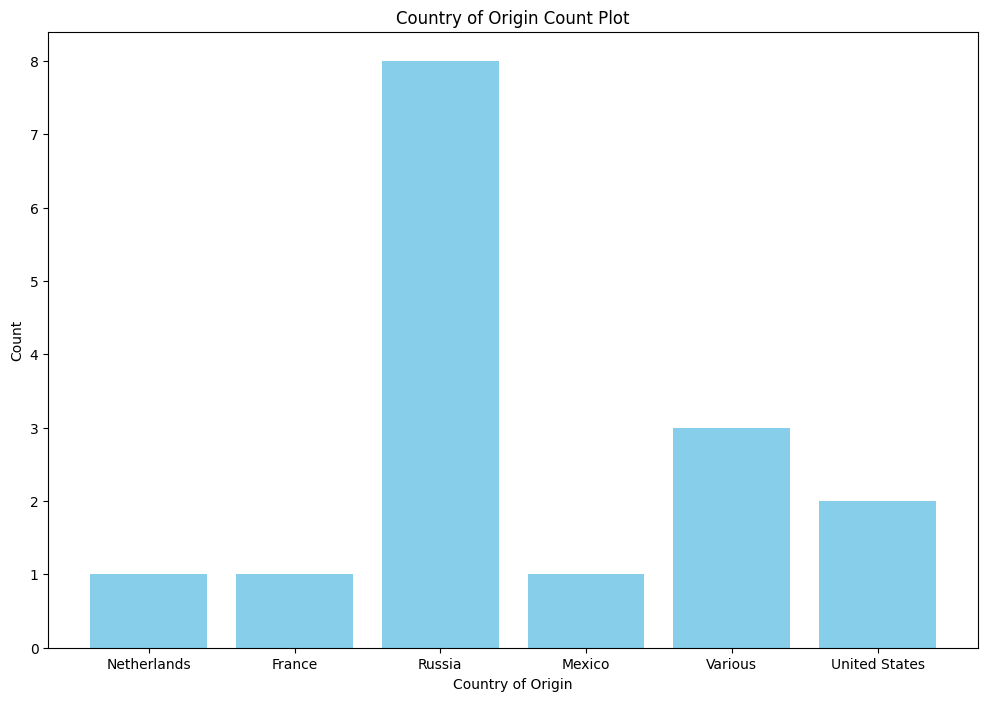

In [28]:
# plot by Country origin
fig = plt.figure(figsize=(12, 8))
# Pivot the DataFrame to prepare for grouped bar chart
plt.bar(df_query['strCountryofOrigin'], df_query['count'], color='skyblue')
plt.xlabel('Country of Origin')
plt.ylabel('Count')
plt.title('Country of Origin Count Plot')
plt.show()

In [48]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def display_dataframe():
    root = tk.Tk()
    root.title("DataFrame Result")

    tree = ttk.Treeview(root)
    tree["columns"] = list(df_query.columns)
    tree["show"] = "headings"

    for column in df_query.columns:
        tree.heading(column, text=column)

    for index, row in df_query.iterrows():
        tree.insert("", "end", values=list(row))

    tree.pack(expand=True, fill="both")
    # Create a canvas to display the plot
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack()

    root.mainloop()

# Call the function to display the DataFrame in GUI
display_dataframe()

In [11]:
# Close the conn, engine
conn.close()
engine.dispose()